ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
X = matrix [1 10]
Y = matrix [1 10]
BBB = cell [1 1]
BBB{1}.X = matrix [1 10]
BBB{1}.Y = matrix [1 10]
CTX.layers{1}.unit = maxout
_.unit = maxout
_.W = matrix [2 1 4]
_.b = matrix [2 4]
_.size_x = [1 1]
_.size_z = [4 1]
_.num_u = 2
_.num_p = 16
_.cfg = cell [1 2]
CTX.layers{2}.unit = maxout
_.unit = maxout
_.W = matrix [2 4]
_.b = matrix [2 1]
_.size_x = [4 1]
_.size_z = [1 1]
_.num_u = 2
_.num_p = 10
_.cfg = cell [1 2]
CTX.layers{3}.unit = sigmoid
_.unit = sigmoid
_.size_x = [1 1]
_.size_z = [1 1]
_.num_p = 0
_.cfg = sigmoid
CTX.optimizers{1}.unit = nesterov
_.unit = nesterov
_.rate = 0.100000
_.mu = 0.900000
_.ggg1 = matrix [26 1]
_.ggg2 = matrix [26 1]
_.cfg = cell [1 2]
CTX.optimizers{2}.unit = gradient_clipping
_.unit = gradient_clipping
_.maxnorm = 0.330000
_.cfg = cell [1 2]
CTX.optimizers{3}.unit = stats
_.unit = stats
_.iter = 0
_.cfg = stats
CTX.objective.unit = binlogloss
_.unit = binlogloss
_.eps = 0.000000
_.cfg = binl

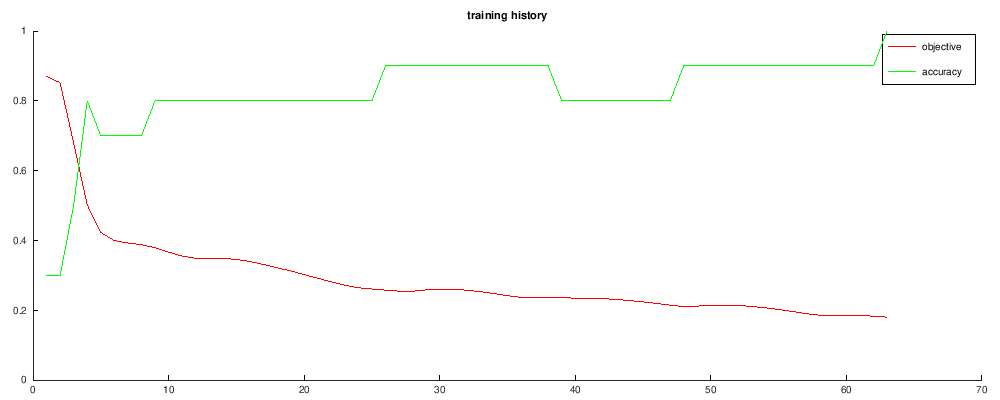

In [2]:
clear all;

global ipynb = 'classification-0';

source('clearest-nn.m');
source('utils-training.m');
          
X = [ -2.2, -1.4, -0.8, 0.2, 0.4, 0.8, 1.2, 2.2, 2.9, 4.6 ];
Y = [    0,    0,    1,   0,   1,   1,   1,   1,   1,   1 ];

printsize('X');
printsize('Y');

rand('state', 1);

BBB = minibatches(X, Y);

printsize('BBB');
printsize('BBB{1}.X');
printsize('BBB{1}.Y');

function TEST(CTX, X, Y)
    Z       = predict(CTX, X);
    Z       = Z > 0.5;
    metrics = measure_binary_classification(Z, Y);
    printvar('metrics');
end

function test(CTX, X, Y, BBB, times=501)
    CTX = objective(CTX, 'binlogloss');
    printmodel('CTX');
    TEST(CTX, X, Y);
    CTX = TRAIN(CTX, BBB, times);
    TEST(CTX, X, Y);
end

CTX = model(1, {'maxout', 4}, {'maxout', 1}, 'sigmoid');
CTX = optimization( CTX, {'nesterov', 0.1}, {'gradient_clipping',0.33}, 'stats');
test(CTX, X, Y, BBB);


In [ ]:
CTX = model(1, {'maxout', 4}, {'maxout', 1}, 'sigmoid');
CTX = optimization( CTX, {'momentum', 0.1});
CTX = tune(CTX, 'momentum', 'rate', 0.01, 'mu', 0.95);
test(CTX, X, Y, BBB);

In [ ]:
CTX = model(1, {'maxout', 3}, {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'momentum', 0.1});
test(CTX, X, Y, BBB);

In [ ]:
CTX = model(1, {'dense', 3}, 'tanh', {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'adam', 0.1});
test(CTX, X, Y, BBB);

In [ ]:
CTX = model(1, {'dense', 3}, 'relu', {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'adam', 0.1});
test(CTX, X, Y, BBB);

In [ ]:
CTX = model(1, {'dense', 3}, {'batchnorm'}, 'tanh', {'dense', 1}, 'sigmoid');
CTX = optimization( CTX, {'adam', 0.1});
test(CTX, X, Y, BBB);